In [4]:
from __future__ import print_function
__author__= 'cb'

import pylab as pl # packages makes nice plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
random.seed(10012018)
mean = 200
df = mean

In [6]:
#numpy.random.chisquare(df, size=100)

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


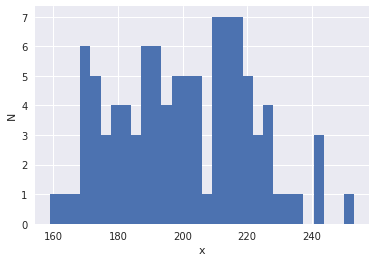

In [7]:
dict = {} #creates empty dictionary called 'dict'
dict['chisq'] = numpy.random.chisquare(df, size=100) # my dict now has one object with key 'chisq'
pl.hist(dict['chisq'], bins=30)
pl.xlabel('x')
pl.ylabel('N')

Figure 1.1: Chi squared distribution with df=100 and N=100

In [8]:
#print(dict['chisq'].mean())
#print(dict['chisq'].std())
print("The chi-squared mean is %.2f and the standard deviation is %.2f" % (dict['chisq'].mean(), dict['chisq'].std()))

The chi-squared mean is 200.38 and the standard deviation is 20.52


In [9]:
## 1 
## Chi-squared 
mysize = (2000 / (np.array(range(1,100)))).astype(int)
print(mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


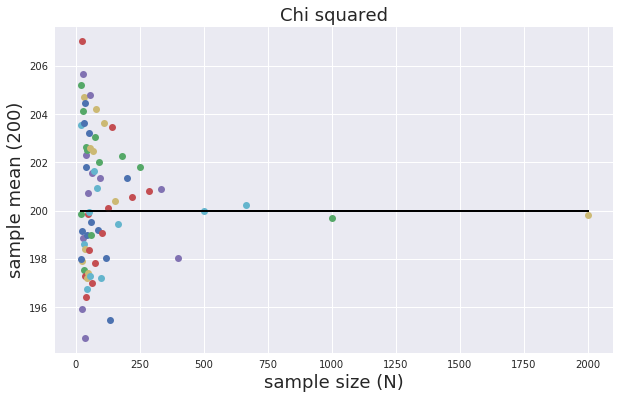

In [10]:
dict['chisq'] = {}
for n in mysize:
    dict['chisq'][n] = np.random.chisquare(df, size=n)

dict['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict['chisq']:
    if not type(nn) == str:
        dict['chisq']['means'][nn] = dict['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, dict['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size (N)', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean (200)', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 1.1: Chi-squared distribution of size N and sample mean 200. For the smaller sample sizes, the distribution around the sample mean is quite spread out. As N becomes larger, the observations become closer to the sample mean. 

Text(0.5,1,'Chi-Squared Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


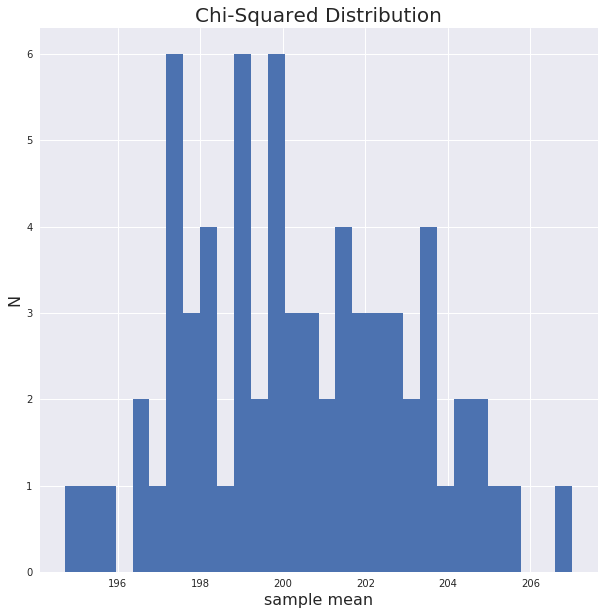

In [11]:
allmeans = list(dict['chisq']['means'].values())
pl.figure(figsize=(10,10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=16)
pl.ylabel('N', fontsize=16)
pl.title('Chi-Squared Distribution', fontsize=20)

Figure 1.2: A histogram showing the distribution of sample size N against the sample means. The distribution resembles a Gaussian distribution. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


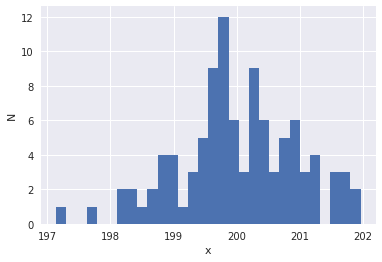

In [12]:
##2 
##NORMAL Distribution 

distribution_2 = ['lnorm']
mean2 = 200
#dict = {} #creates empty dictionary called 'dict' ## DON'T NEED THIS ANYMORE
dict['lnorm'] = numpy.random.normal(loc=200, size=100) # my dict now has object with key 'lnorm'
pl.hist(dict['lnorm'], bins=30)
pl.xlabel('x')
pl.ylabel('N')

Figure 2.1: Normal distribution with mean 200 and size 100. 

In [13]:
print("The normal mean is %.2f and the standard deviation is %.2f" % (dict['lnorm'].mean(), dict['lnorm'].std()))

The normal mean is 200.02 and the standard deviation is 0.94


In [14]:
## Normal distribution 
mysize = (2000 / (np.array(range(1,100)))).astype(int)
print(mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


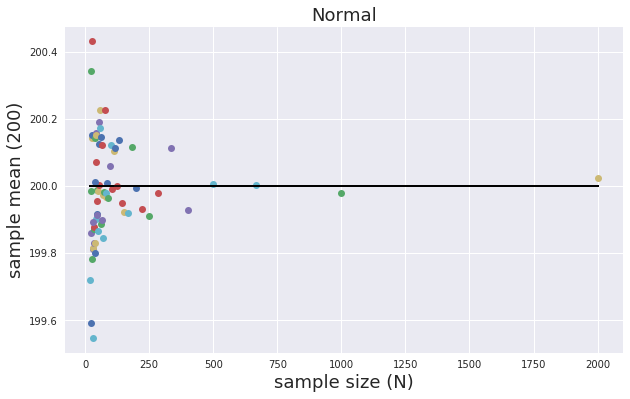

In [15]:
dict['norm'] = {}
for n in mysize:
    dict['norm'][n] = np.random.normal(mean2, size=n)

dict['norm']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict['norm']:
    if not type(nn) == str:
        dict['norm']['means'][nn] = dict['norm'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, dict['norm']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size (N)', fontsize=18)
        axnormal_mu_n.set_ylabel('sample mean (200)', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 2.2: Normal distribution with mean 200 and N sample sizes. For the smaller sample sizes, the distribution around the sample mean is still spread out, but less so than the chi-squared distribution. As N becomes larger, the observations become closer to the sample mean. 

Text(0.5,1,'Normal Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


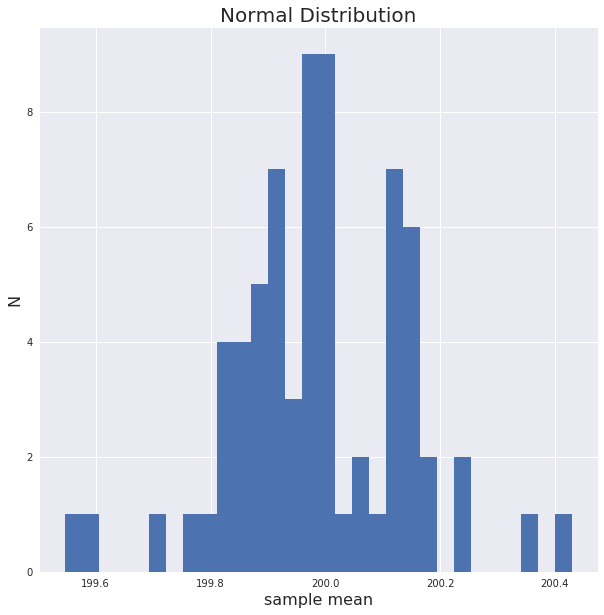

In [16]:
allmeans = list(dict['norm']['means'].values())
pl.figure(figsize=(10,10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=16)
pl.ylabel('N', fontsize=16)
pl.title('Normal Distribution', fontsize=20)

Figure 2.3: Normal distribution with mean 200 and size N. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


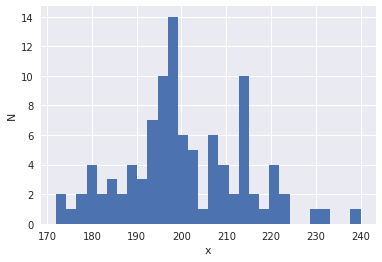

In [17]:
## 3 
##Poisson distribution
dict['pois'] = numpy.random.poisson(lam=mean2, size=100) # my dict now has one object with key 'chisq'
pl.hist(dict['pois'], bins=30)
pl.xlabel('x')
pl.ylabel('N')

Figure 3.1: Poisson distribution with mean 200 and N=100

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


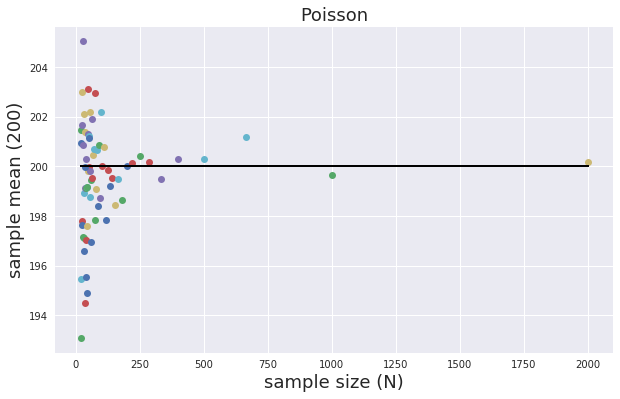

In [18]:
dict['pois'] = {}
for n in mysize:
    dict['pois'][n] = np.random.poisson(mean2, size=n)

dict['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict['pois']:
    if not type(nn) == str:
        dict['pois']['means'][nn] = dict['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, dict['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size (N)', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean (200)', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 3.2: Poisson distribution with mean 200 and size N. For the smaller sample sizes, the distribution around the sample mean is quite spread out. As N becomes larger, the observations become closer to the sample mean. 

Text(0.5,1,'Poisson Means')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


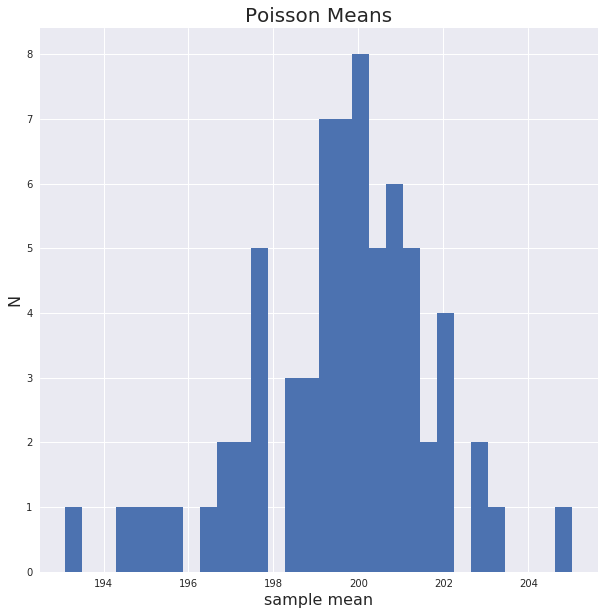

In [19]:
allmeans = list(dict['pois']['means'].values())
pl.figure(figsize=(10,10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=16)
pl.ylabel('N', fontsize=16)
pl.title('Poisson Means', fontsize=20)

Figure 3.3: Plotting N against Poisson sample means. For the smaller sample sizes, the distribution around the sample mean is quite spread out. As N becomes larger, the observations become closer to the sample mean. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


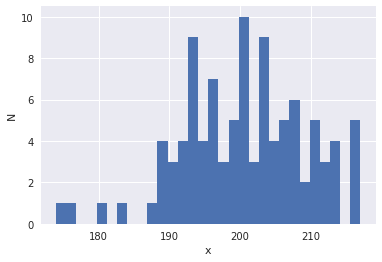

In [20]:
## 4 
## Binomial 
dict['binom'] = numpy.random.binomial(400,0.5, size = 100) # my dict now has one object with key 'chisq'
pl.hist(dict['binom'], bins=30)
pl.xlabel('x')
pl.ylabel('N')

Figure 4.1: Binomial distribution of mean 200 and n=100

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


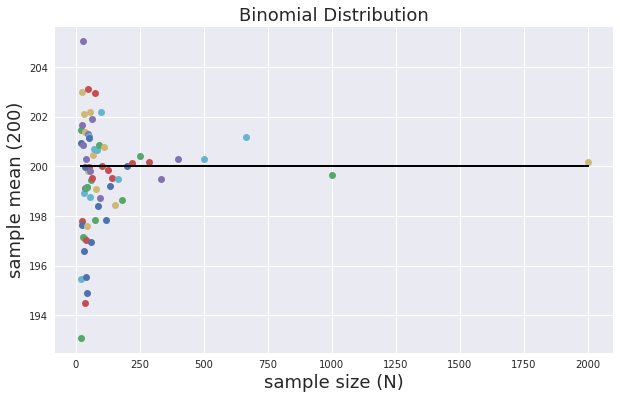

In [21]:
dict['binom'] = {}
for n in mysize:
    dict['binom'][n] = np.random.binomial(df*2, p=.5, size=n)

dict['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict['binom']:
    if not type(nn) == str:
        dict['binom']['means'][nn] = dict['binom'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, dict['pois']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size (N)', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean (200)', fontsize=18)
        axbinom_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 4.2: Binomial distribution of size N and sameple mean 200. 

Text(0.5,1,'Binomial Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


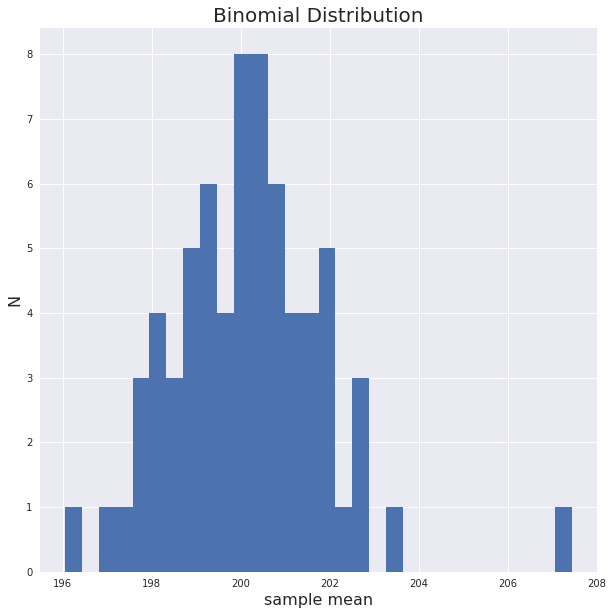

In [22]:
allmeans = list(dict['binom']['means'].values())
pl.figure(figsize=(10,10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=16)
pl.ylabel('N', fontsize=16)
pl.title('Binomial Distribution', fontsize=20)

Figure 4.3: Binomial distribution of the sample means, size N. 

Text(0.5,1,'LaPlace Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


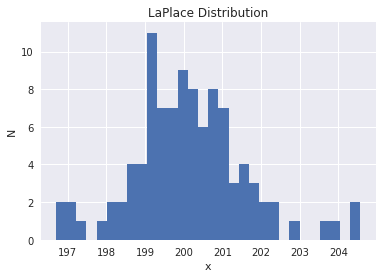

In [29]:
## 5
## LaPlace

dict['lap'] = numpy.random.laplace(loc = df, scale = 1.0, size=100) 
pl.hist(dict['lap'], bins=30)
pl.xlabel('x')
pl.ylabel('N')
pl.title('LaPlace Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


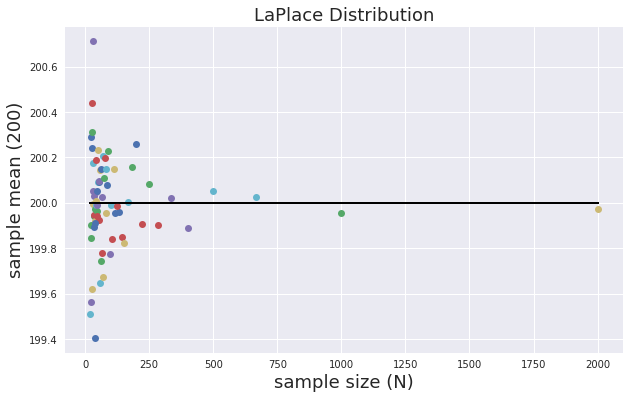

In [30]:
dict['lap'] = {}
for n in mysize:
    dict['lap'][n] = np.random.laplace(loc = df, scale = 1.0, size=n) 

dict['lap']['means'] = {}
axlap_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in dict['lap']:
    if not type(nn) == str:
        dict['lap']['means'][nn] = dict['lap'][nn].mean()
        #and plot it
        axlap_mu_n.plot(nn, dict['lap']['means'][nn], 'o')
        axlap_mu_n.set_xlabel('sample size (N)', fontsize=18)
        axlap_mu_n.set_ylabel('sample mean (200)', fontsize=18)
        axlap_mu_n.set_title('LaPlace Distribution', fontsize=18)
        axlap_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0.5,1,'LaPlace Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


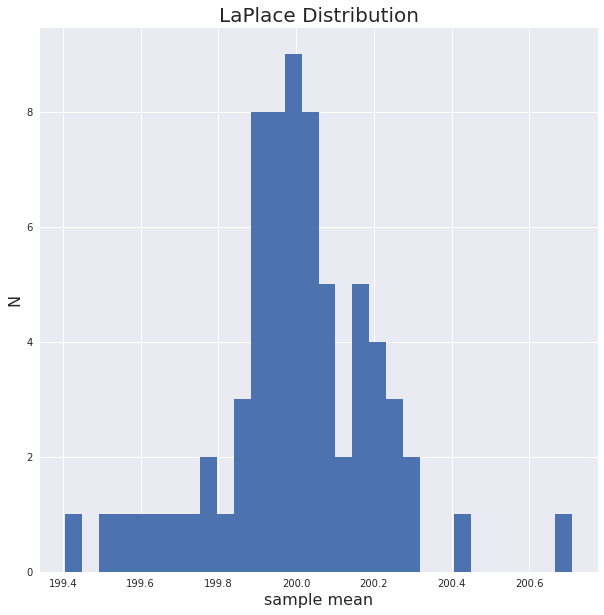

In [31]:
allmeans = list(dict['lap']['means'].values())
pl.figure(figsize=(10,10))
pl.hist(allmeans, bins=30)
pl.xlabel('sample mean', fontsize=16)
pl.ylabel('N', fontsize=16)
pl.title('LaPlace Distribution', fontsize=20)

Text(0.5,1,'All Distributions')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


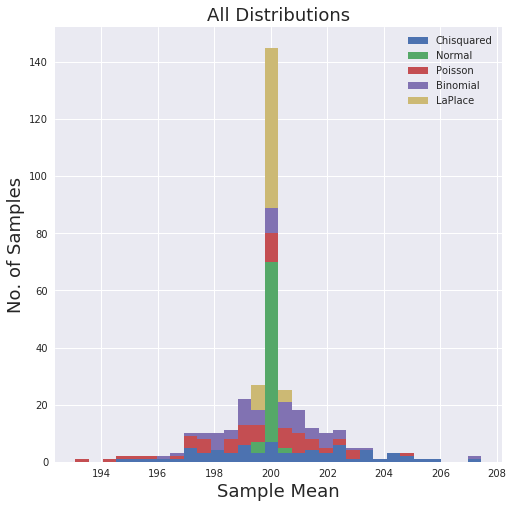

In [35]:
# Plotting all distributions as a histogram
Chisquared = list(dict['chisq']['means'].values())
Normal = list(dict['norm']['means'].values())
Poisson = list(dict['pois']['means'].values())
Binomial = list(dict['binom']['means'].values())
Laplace = list(dict['lap']['means'].values())
pl.figure(figsize=(8,8))
pl.hist((Chisquared, Normal, Poisson, Binomial, Laplace),bins=30,stacked=True)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('No. of Samples', fontsize = 18)
pl.legend(('Chisquared','Normal','Poisson','Binomial','LaPlace'),loc='upper right')
pl.title("All Distributions", fontsize = 18)